<a href="https://colab.research.google.com/github/prasaddaddhala/OIBSIP/blob/main/iris_flower_classification_with_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


In [ ]:
# Download file into workspace
iris_df= pd.read_csv("/content/Iris.csv")
print("Data imported successfully")

Data imported successfully


In [ ]:
# Read First Five rows
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Delete Id column as it is not required
iris_df.drop('Id', axis= 1 , inplace = True) 
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# No. of rows and columns in the dataset
iris_df.shape

(150, 5)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check for duplicate data
dupl=iris_df.duplicated()
print('No. of duplicate rows is', dupl.sum())
iris_df[dupl]

No. of duplicate rows is 3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
# Delete duplicate rows
iris_df.drop_duplicates(inplace=True) 
print(iris_df.duplicated().sum(), 'duplicate rows')

0 duplicate rows


In [ ]:
# No. of rows and columns after deleting duplicates
iris_df.shape

(147, 5)

In [ ]:
# No. of data for each types of species 
iris_df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

### Box Plot

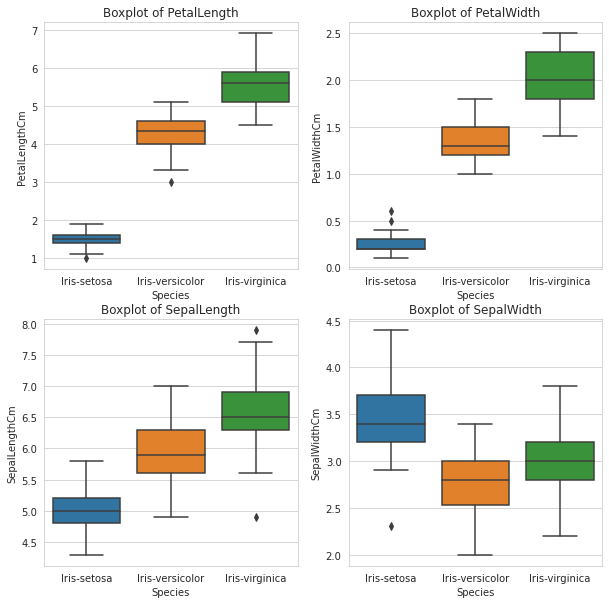

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Box plot of Petal Length
sns.boxplot(ax=ax[0,0], x="Species",y="PetalLengthCm",data=iris_df);
ax[0,0].set_title("Boxplot of PetalLength")

# Box plot of Petal Width
sns.boxplot(ax=ax[0,1], x="Species",y="PetalWidthCm",data=iris_df);
ax[0,1].set_title("Boxplot of PetalWidth")

# Box Plot of Sepal Leangth
sns.boxplot(ax=ax[1,0], x="Species",y="SepalLengthCm",data=iris_df);
ax[1,0].set_title("Boxplot of SepalLength")

# box plot of Sepal Width
sns.boxplot(ax=ax[1,1], x="Species",y="SepalWidthCm",data=iris_df);
ax[1,1].set_title("Boxplot of SepalWidth");

### Distribution Graph

### Box Plot of individual atributes

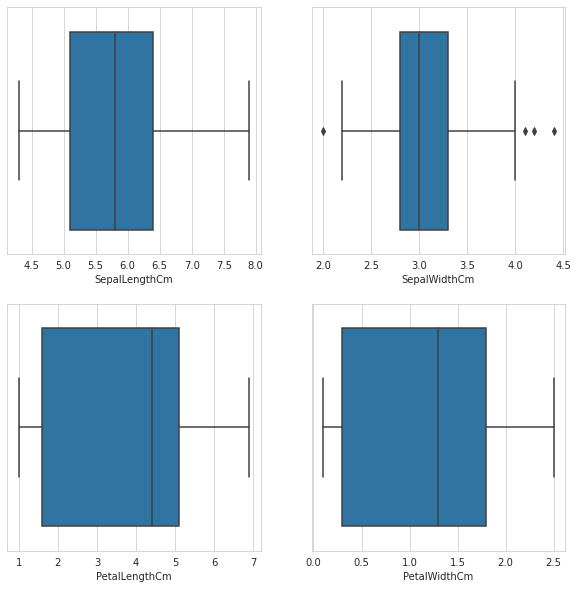

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=ax[0,0], x='SepalLengthCm', data=iris_df)

sns.boxplot(ax=ax[0,1], x='SepalWidthCm', data=iris_df)

sns.boxplot(ax=ax[1,0], x='PetalLengthCm', data=iris_df)

sns.boxplot(ax=ax[1,1], x='PetalWidthCm', data=iris_df)

### Four outliers are present in Sepal Width

In [ ]:
# Remove outliers from Sepal width

q1 = iris_df['SepalWidthCm'].quantile(0.25)
q3 = iris_df['SepalWidthCm'].quantile(0.75) 
iq_range = q3 - q1
iris_df = iris_df[(iris_df['SepalWidthCm'] >= q1-1.5*iq_range) & (iris_df['SepalWidthCm'] <= q3+1.5*iq_range)]

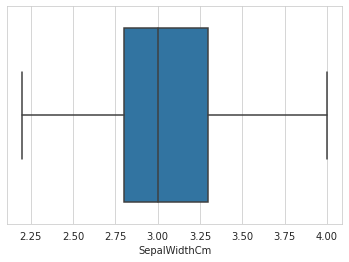

In [ ]:
# Box plot of sepal Width after outlier treatment
sns.boxplot(x='SepalWidthCm', data=iris_df)

In [ ]:
# No. of rows and columns after outlier treatment
iris_df.shape

(143, 5)

### Correlation

In [ ]:
# Correlation between attributes
corr = iris_df.corr()
corr


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113268,0.879015,0.821715
SepalWidthCm,-0.113268,1.000000,-0.396539,-0.328102
PetalLengthCm,0.879015,-0.396539,1.000000,0.960785
PetalWidthCm,0.821715,-0.328102,0.960785,1.000000


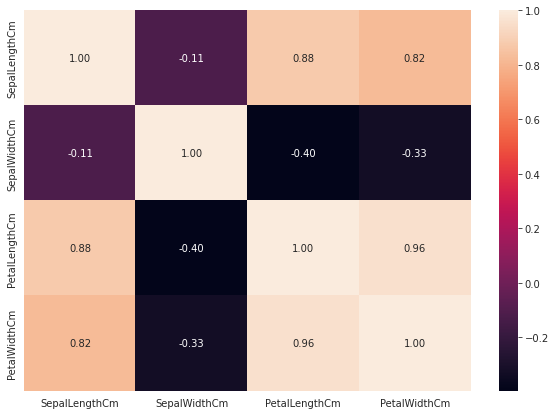

In [ ]:
# Heat map of correlations
#mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 7))
sns.heatmap(iris_df.corr(), annot=True,fmt='.2f', )
plt.show()

### Pair Plots

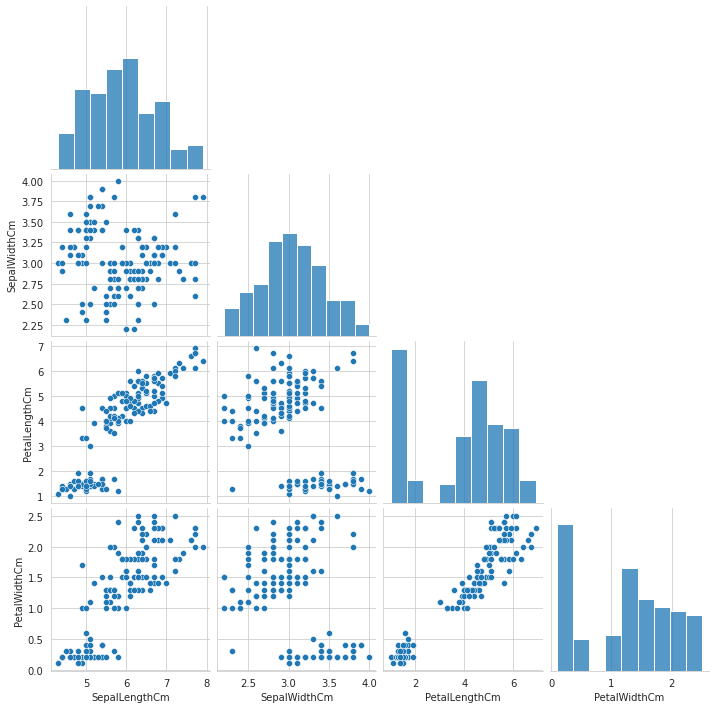

In [ ]:
sns.pairplot(iris_df, corner=True)
plt.show() 

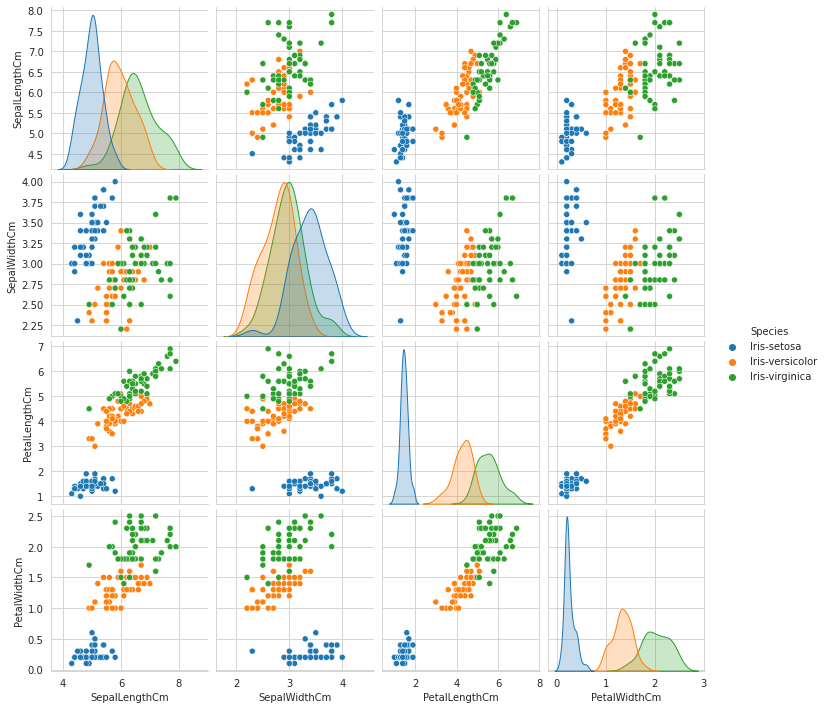

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(iris_df, hue='Species')
plt.show()


###  Label Encoding

In [ ]:
# Encode species value(i.e. object) to integers
L_encoder=LabelEncoder()
## Assingning encoded integer values to "Species" column
iris_df["Species"]=L_encoder.fit_transform(iris_df["Species"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Preparation

In [ ]:
# Seprate data into Attributes and labels
X=iris_df.iloc[:, :-1]
label=iris_df.iloc[:,-1]

In [ ]:
# Split data for Training(80%) and Testing(20%)
X_train, X_test, train_labels, test_labels = train_test_split(X, label, test_size=0.2, random_state=1)

In [ ]:
# Shape of splited data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (114, 4)
X_test (29, 4)
train_labels (114,)
test_labels (29,)


### Training the Model

In [ ]:
# Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion = 'gini')
dt_clf.fit(X_train, train_labels)

DecisionTreeClassifier()

### Testing model with test data

In [ ]:
# Prediction with test data
pred = dt_clf.predict(X_test)  

### Evaluating the model

In [ ]:
# Accuracy of the model for test data
print("The accuracy of the model is", accuracy_score(pred,test_labels) *100,"%")

The accuracy of the model is 100.0 %


### Testing model with own values

In [ ]:
## Predicting with random values
pred1=dt_clf.predict([[6,4,1,3]])
pred1

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Cunfusion Matrix

In [ ]:
# Confusion Matrix of test labels and predicted labels
C_matrix=confusion_matrix(test_labels , pred)
C_matrix

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  6]])

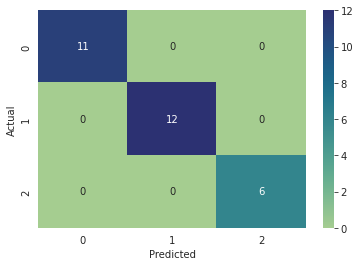

In [ ]:
# Heat map of confusion matrix

cm_df = pd.DataFrame(C_matrix, columns=np.unique(test_labels), index = np.unique(test_labels))
cm_df.index.name = 'Actual'
cm_df.columns.name= 'Predicted'
sns.heatmap(cm_df, cmap = "crest", annot=True) ;

### Visualize the model

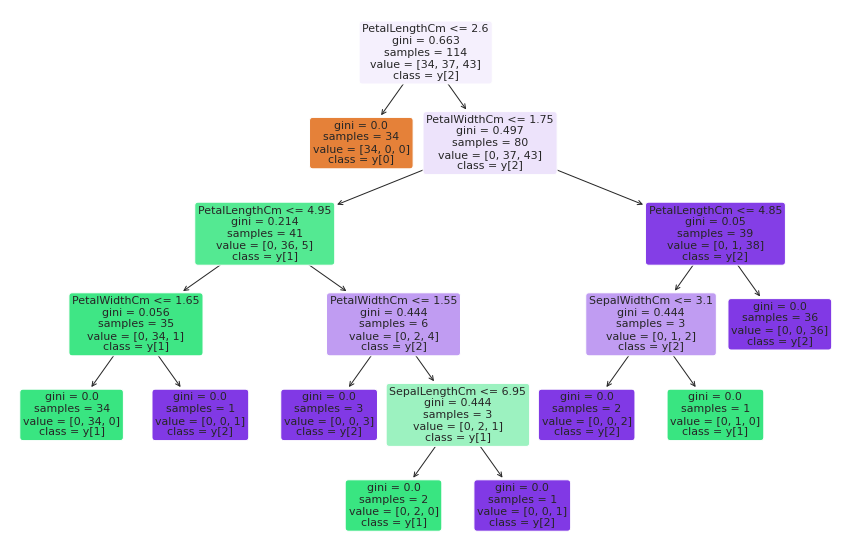

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(15,10))
tree = plot_tree(dt_clf, feature_names=iris_df.columns, rounded=True, filled=True, class_names=True, fontsize=11)

### Thank you